# EMA Crossover

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [4]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [5]:
ema_s = 50
ema_l = 200

In [6]:
data["EMA_S"] = data.price.ewm(span = ema_s, min_periods = ema_s).mean() 

In [7]:
data["EMA_L"] = data.price.ewm(span = ema_l, min_periods = ema_l).mean() 

In [8]:
data

,price,EMA_S,EMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.106470
2020-06-25,1.125087,1.110279,1.106655
2020-06-26,1.122208,1.110746,1.106810


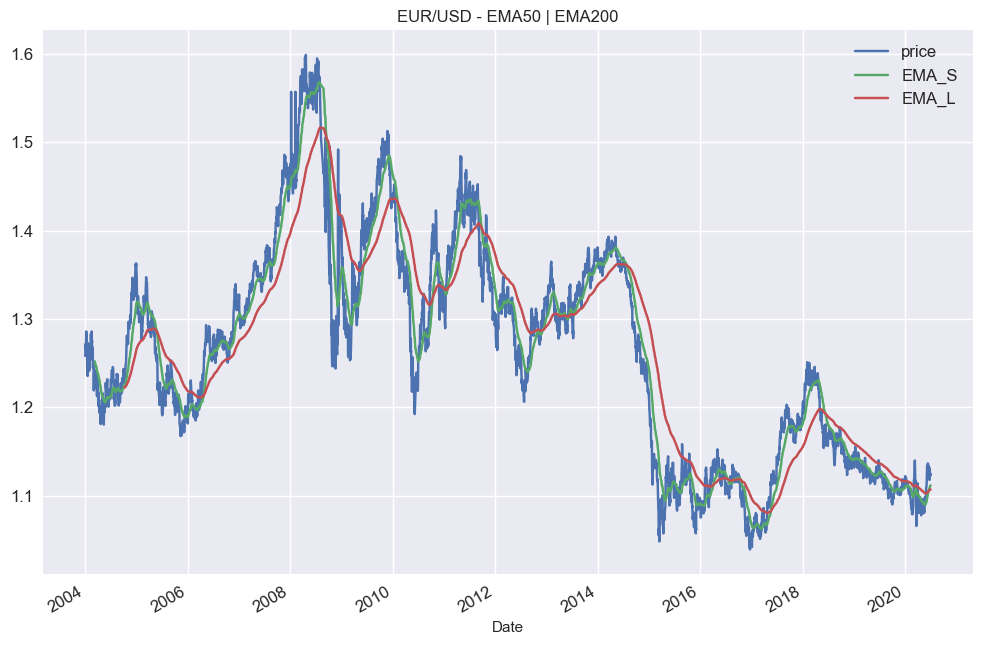

In [9]:
data.plot(figsize = (12, 8), title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

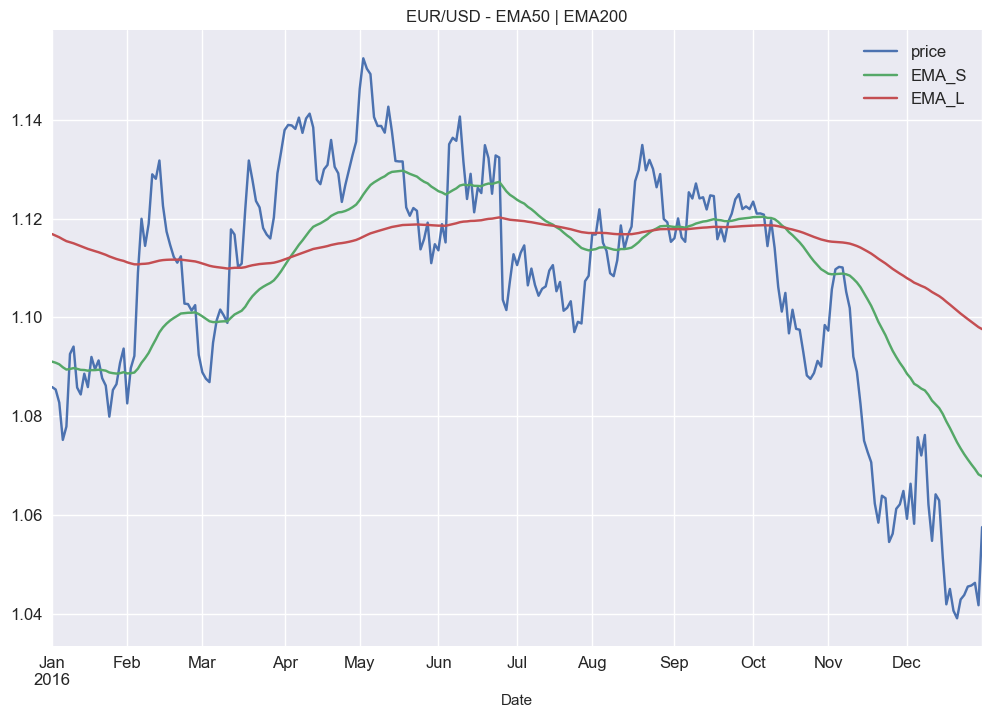

In [10]:
data.loc["2016", ["price", "EMA_S", "EMA_L"]].plot(figsize = (12, 8), fontsize = 12,
                                                   title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.legend(fontsize = 12)
plt.show()

In [11]:
data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1 )

In [12]:
data

,price,EMA_S,EMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1
2020-06-25,1.125087,1.110279,1.106655,1
2020-06-26,1.122208,1.110746,1.106810,1


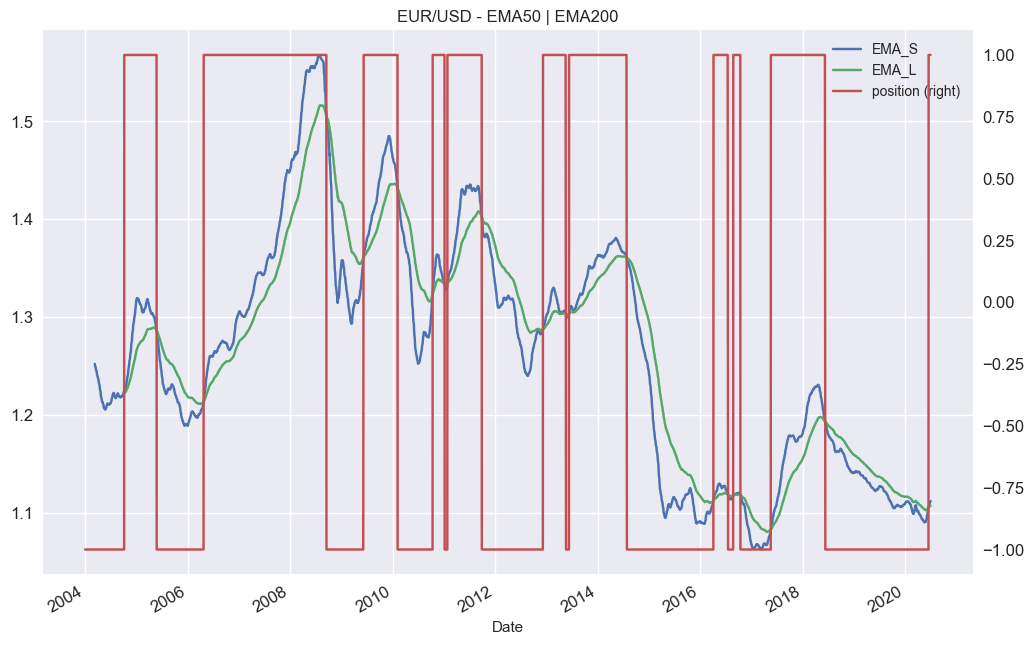

In [13]:
data.loc[:, ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                 title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

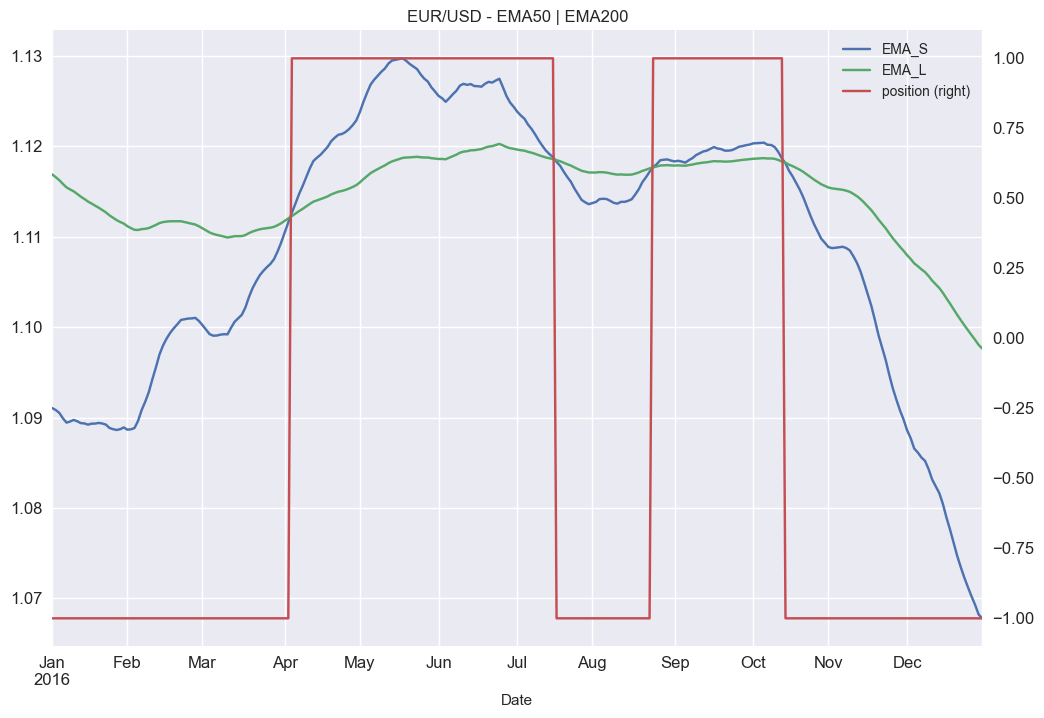

In [14]:
data.loc["2016", ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

## Vectorized Strategy Backtesting

In [15]:
data

,price,EMA_S,EMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1
2020-06-25,1.125087,1.110279,1.106655,1
2020-06-26,1.122208,1.110746,1.106810,1


In [16]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [17]:
data.dropna(inplace = True)

In [18]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [19]:
data

,price,EMA_S,EMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.223852,1.222221,1,-0.002853,NaN
2004-10-07,1.229906,1.224089,1.222309,1,0.001475,0.001475
2004-10-08,1.241003,1.224753,1.222524,1,0.008982,0.008982
2004-10-11,1.238405,1.225288,1.222706,1,-0.002095,-0.002095
2004-10-12,1.232104,1.225556,1.222813,1,-0.005102,-0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1,0.002892,0.002892
2020-06-25,1.125087,1.110279,1.106655,1,-0.005449,-0.005449
2020-06-26,1.122208,1.110746,1.106810,1,-0.002562,-0.002562


In [20]:
data.dropna(inplace = True)

In [21]:
ptc = 0.00007

In [22]:
data["trades"] = data.position.diff().fillna(0).abs()

In [23]:
data.trades.value_counts()

trades
0.0    4055
2.0      20
Name: count, dtype: int64

In [24]:
data

,price,EMA_S,EMA_L,position,returns,strategy,trades
Date,,,,,,,
2004-10-07,1.229906,1.224089,1.222309,1,0.001475,0.001475,0.0
2004-10-08,1.241003,1.224753,1.222524,1,0.008982,0.008982,0.0
2004-10-11,1.238405,1.225288,1.222706,1,-0.002095,-0.002095,0.0
2004-10-12,1.232104,1.225556,1.222813,1,-0.005102,-0.005102,0.0
2004-10-13,1.234903,1.225922,1.222951,1,0.002270,0.002270,0.0
...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1,0.002892,0.002892,0.0
2020-06-25,1.125087,1.110279,1.106655,1,-0.005449,-0.005449,0.0
2020-06-26,1.122208,1.110746,1.106810,1,-0.002562,-0.002562,0.0


In [26]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [27]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

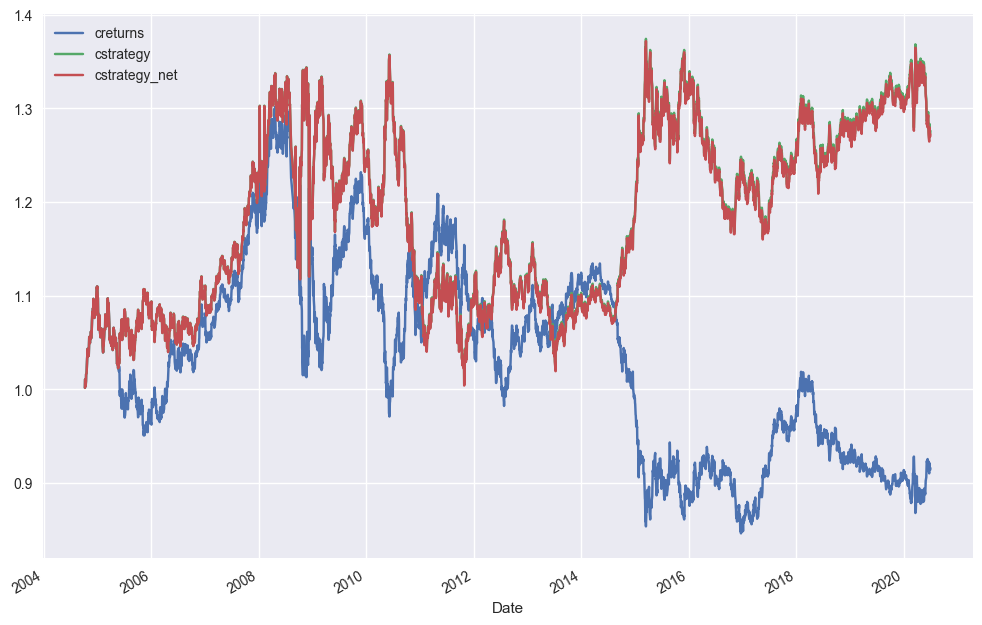

In [28]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

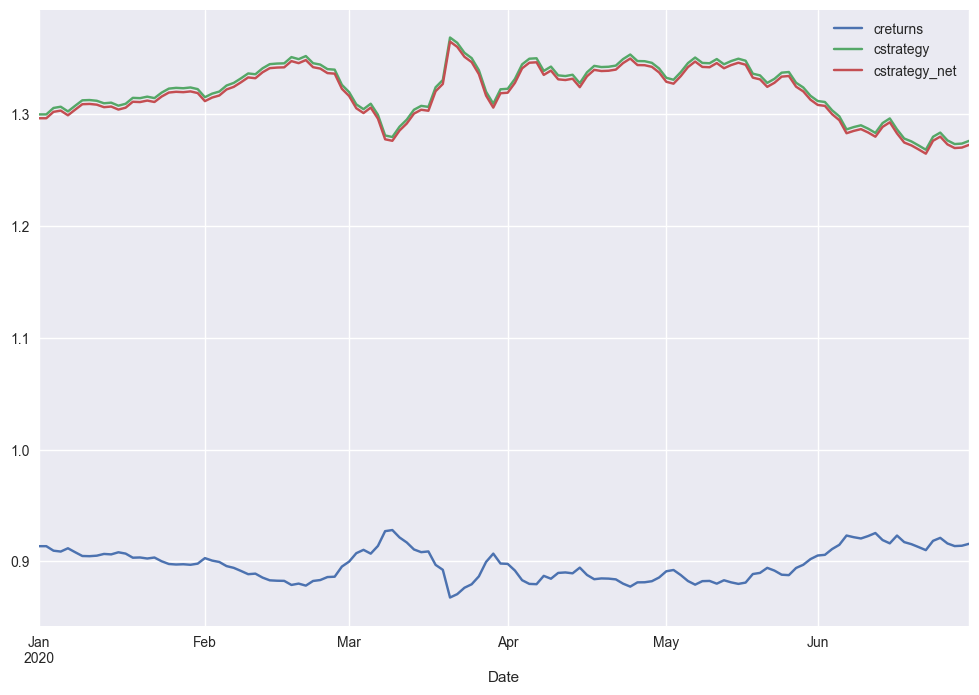

In [29]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()